In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
# import plotly.graph_objs as go
# import plotly.plotly as py
# import cufflinks
from IPython.core.interactiveshell import InteractiveShell
# import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
# from plotly.offline import iplot
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')

In [3]:
import keras

In [4]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', random_state=42)
twenty_test = fetch_20newsgroups(subset='test', random_state=42)

In [6]:
my_dict = dict(zip(twenty_train.data , twenty_train.target))
train= pd.DataFrame.from_dict(my_dict, orient= 'index')
train.reset_index(inplace=True)
train.columns = ['Features', 'Target']
train.head()

,Features,Target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [7]:
my_dict = dict(zip(twenty_test.data , twenty_test.target))
test= pd.DataFrame.from_dict(my_dict, orient= 'index')
test.reset_index(inplace=True)
test.columns = ['Features', 'Target']
test.head()

,Features,Target
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [8]:
df = train.append(test)

In [9]:
# df.loc[df['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
# df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
# df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
# df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
# df = df[df.Product != 'Other financial service']

In [10]:
# df['Product'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Complaints', 
#                                                                 title='Number complaints in each product')

In [11]:
# def print_plot(index):
#     example = df[df.index == index][['Consumer complaint narrative', 'Product']].values[0]
#     if len(example) > 0:
#         print(example[0])
#         print('Product:', example[1])

In [12]:
# print_plot(10)

In [13]:
# print_plot(100)

In [14]:
# df = df.reset_index(drop=True)
# REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
# STOPWORDS = set(stopwords.words('english'))

# def clean_text(text):
#     """
#         text: a string
        
#         return: modified initial string
#     """
#     text = text.lower() # lowercase text
#     text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
#     text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#     text = text.replace('x', '')
# #    text = re.sub(r'\W+', '', text)
#     text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
#     return text
# df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)

In [15]:
# df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')

In [16]:
# print_plot(10)

In [17]:
# print_plot(100)

In [18]:
# # The maximum number of words to be used. (most frequent)
# MAX_NB_WORDS = 50000
# # Max number of words in each complaint.
# MAX_SEQUENCE_LENGTH = 250
# # This is fixed.
# EMBEDDING_DIM = 100

# tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# tokenizer.fit_on_texts(df['Consumer complaint narrative'].values)
# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

In [19]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Features'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 341159 unique tokens.


In [20]:
X = tokenizer.texts_to_sequences(df['Features'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (18846, 250)


In [21]:
Y = pd.get_dummies(df['Target']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (18846, 20)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16961, 250) (16961, 20)
(1885, 250) (1885, 20)


In [24]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 20)                2020      
Total params: 5,082,420
Trainable params: 5,082,420
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
X_train.shape

(16961, 250)

In [26]:
Y_train.shape

(16961, 20)

In [32]:
epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
239/239 [==============================] - 186s 777ms/step - loss: 0.3941 - accuracy: 0.8780 - val_loss: 1.0891 - val_accuracy: 0.6965
Epoch 2/10
239/239 [==============================] - 151s 632ms/step - loss: 0.2679 - accuracy: 0.9205 - val_loss: 1.0917 - val_accuracy: 0.7101
Epoch 3/10
239/239 [==============================] - 135s 566ms/step - loss: 0.1968 - accuracy: 0.9442 - val_loss: 1.3488 - val_accuracy: 0.6494
Epoch 4/10
239/239 [==============================] - 163s 682ms/step - loss: 0.2042 - accuracy: 0.9417 - val_loss: 1.1385 - val_accuracy: 0.7136


In [28]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

59/59 [==============================] - 4s 62ms/step - loss: 1.0344 - accuracy: 0.6706
Test set
  Loss: 1.034
  Accuracy: 0.671


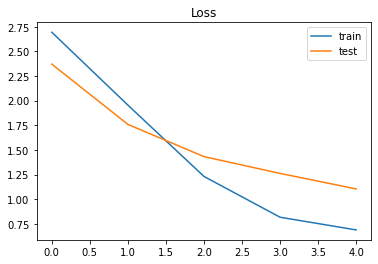

In [29]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

KeyError: 'acc'

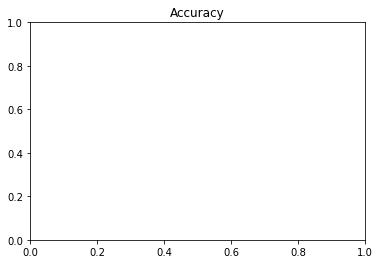

In [31]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

Test with a new complaint.

In [39]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[1.5803229e-02 2.3755017e-03 5.1062729e-04 5.3740919e-01 3.5682529e-01
  8.5910626e-02 3.0194962e-04 2.5151852e-05 3.9089144e-05 1.0010027e-04
  5.1000190e-04 1.3226915e-04 5.6953013e-05]] Credit card or prepaid card
